# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Hafizh Dzaki
- **Email:** 111202113370@mhs.dinus.ac.id
- **ID Dicoding:** haztsu

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan rata-rata polutan setiap bulan di tahun X pada Stasiun Y?
- Bagaimama korelasi perubahan temperatur dengan polutan CO?
- Bagaimana pengaruh arah mata angin dengan polutan di stasiun X pada tahun Y?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
final_df = pd.DataFrame()               # Inisialisasi Dataframe

ds = os.listdir('./dataset')[0]         #
df1 = pd.read_csv(f'./dataset/{ds}')    # Baca 1 dataset, lalu ambil nama kolomnya
kolom1 = df1.columns.tolist()           #

for file in os.listdir('./dataset'):        # Looping ke dalam directory dataset
    df2 = pd.read_csv(f'./dataset/{file}')  # Setiap dataset akan di-read
    kolom2 = df2.columns.tolist()           # Setiap dataset akan diambil nama kolomnya
    if kolom1 != kolom2:                    # Cek setiap dataset, apakah memiliki nama fitur yang sama?
        print('Ada kolom yang tidak sama!') # Apabila ada yang sama, maka akan berikan pesan pada terminal dan keluar dari loop
        break                               #
    final_df = pd.concat([final_df, df2], ignore_index=True) # Menjadikan 1 dataset besar

# final_df.to_csv('./dataset/mainDataset.csv', index=False)

**Insight:**
- Dalam Air Quality Dataset, terdapat 12 dataset yang sudah dipisahkan berdasarkan stasiun.
- Ke-12 dataset memiliki nama kolom yang sama.
- Untuk memudahkan analisis, Penulis akan menyatukan ke-12 dataset menjadi 1 dataset besar yang memuat seluruh informasi.

### Assessing Data

In [3]:
final_df.info() # Melihat informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841536 entries, 0 to 841535
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       841536 non-null  int64  
 1   year     841536 non-null  int64  
 2   month    841536 non-null  int64  
 3   day      841536 non-null  int64  
 4   hour     841536 non-null  int64  
 5   PM2.5    824058 non-null  float64
 6   PM10     828638 non-null  float64
 7   SO2      823494 non-null  float64
 8   NO2      817304 non-null  float64
 9   CO       800134 non-null  float64
 10  O3       814982 non-null  float64
 11  TEMP     840740 non-null  float64
 12  PRES     840750 non-null  float64
 13  DEWP     840730 non-null  float64
 14  RAIN     840756 non-null  float64
 15  wd       837892 non-null  object 
 16  WSPM     840900 non-null  float64
 17  station  841536 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 115.6+ MB


In [4]:
final_df.describe(include='all').round(2) # Melihat deskripsi dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,841536.00,841536.00,841536.00,841536.00,841536.00,824058.00,828638.00,823494.00,817304.00,800134.00,814982.00,840740.00,840750.00,840730.00,840756.00,837892,840900.00,841536
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86670,NaN,70128
mean,17532.50,2014.66,6.52,15.73,11.50,79.79,104.60,15.83,50.64,1230.77,57.37,13.54,1010.75,2.49,0.06,NaN,1.73,NaN
std,10122.11,1.18,3.45,8.80,6.92,80.82,91.77,21.65,35.13,1160.18,56.66,11.44,10.47,13.79,0.82,NaN,1.25,NaN
min,1.00,2013.00,1.00,1.00,0.00,2.00,2.00,0.29,1.03,100.00,0.21,-19.90,982.40,-43.40,0.00,NaN,0.00,NaN
25%,8766.75,2014.00,4.00,8.00,5.75,20.00,36.00,3.00,23.00,500.00,11.00,3.10,1002.30,-8.90,0.00,NaN,0.90,NaN
50%,17532.50,2015.00,7.00,16.00,11.50,55.00,82.00,7.00,43.00,900.00,45.00,14.50,1010.40,3.10,0.00,NaN,1.40,NaN
75%,26298.25,2016.00,10.00,23.00,17.25,111.00,145.00,20.00,71.00,1500.00,82.00,23.30,1019.00,15.10,0.00,NaN,2.20,NaN


In [5]:
print(f'Jumlah data yang null : {final_df.isna().sum().sum()}') # Melihat jumlah data yang kosong
print(f'Jumlah data duplicate : {final_df.duplicated().sum()}') # Melihat jumlah data yang terduplikat

Jumlah data yang null : 148054
Jumlah data duplicate : 420768


In [6]:
print(f'Count untuk arah mata angin :\n {final_df["wd"].value_counts()}')   
# Melihat arah mata angin, dimana angin datang. Misal:
# NE : NorthEast (Angin berhembus dari Timur laut ke arah Barat Daya)
# ENE : East-NorthEast (Angin berhembus dari arah sekitar Timur dan Timur Laut, lalu berhembus ke arah sekitar Barat Daya)

Count untuk arah mata angin :
 wd
NE     86670
ENE    68284
NW     65200
N      61738
E      59504
SW     57512
NNE    56464
NNW    50652
WNW    48750
ESE    48440
SSW    45126
SE     40148
WSW    40080
S      38810
SSE    35388
W      35126
Name: count, dtype: int64


In [7]:
print(f'Count untuk nama stasiun :\n {final_df["station"].value_counts()}')
#  Melihat nama Stasiun di Cina (dari bahasanya, ini bahasa Cina hehe)

Count untuk nama stasiun :
 station
Aotizhongxin     70128
Changping        70128
Dingling         70128
Dongsi           70128
Guanyuan         70128
Gucheng          70128
Huairou          70128
Nongzhanguan     70128
Shunyi           70128
Tiantan          70128
Wanliu           70128
Wanshouxigong    70128
Name: count, dtype: int64


**Insight:**
- Dilihat dari informasinya, fitur dataset didominasi dengan angka numerik kontinu.
- Dilihat dari deskripsinya, fitur dataset masih terbilang masuk akal, seperti:
    - hari = min : 1 | max : 31.
    - suhu = min : -19.90 | max : 41 (masih masuk akan untuk wilayah china).
- Jumlah data yang null : 74027.
- Jumlah data duplicate : 0.
- Dari penamaan arah mata angin masih Ok.
- Dari penamaan stasiun kereta masih Ok.
- Karena tidak memiliki domain pengetahuan tentang cuaca, maka Penulis menganggap nilai pada Dataset semua penting.

### Cleaning Data

In [8]:
clean_df = final_df.copy()      # Buat salinan dari final df
clean_df.dropna(inplace=True)   # Buang data yang memiliki nilai kosong

print(f'Jumlah data yang null : {clean_df.isna().sum().sum()}') # Melihat jumlah data yang kosong setelah dibersihkan

Jumlah data yang null : 0


In [9]:
clean_df.drop('No', axis=1, inplace=True) # Hapus kolom yang tidak perlu

In [10]:
clean_df.info() # Melihat informasi dataset setelah dibersihkan 

<class 'pandas.core.frame.DataFrame'>
Index: 764336 entries, 0 to 841535
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     764336 non-null  int64  
 1   month    764336 non-null  int64  
 2   day      764336 non-null  int64  
 3   hour     764336 non-null  int64  
 4   PM2.5    764336 non-null  float64
 5   PM10     764336 non-null  float64
 6   SO2      764336 non-null  float64
 7   NO2      764336 non-null  float64
 8   CO       764336 non-null  float64
 9   O3       764336 non-null  float64
 10  TEMP     764336 non-null  float64
 11  PRES     764336 non-null  float64
 12  DEWP     764336 non-null  float64
 13  RAIN     764336 non-null  float64
 14  wd       764336 non-null  object 
 15  WSPM     764336 non-null  float64
 16  station  764336 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 105.0+ MB


In [11]:
print(f'Count untuk nama stasiun :\n {clean_df["station"].value_counts().sort_values()}')
#  Melihat nama Stasiun di Cina setelah dibersihkan

Count untuk nama stasiun :
 station
Shunyi           60388
Dongsi           60676
Wanliu           61268
Dingling         62612
Huairou          63416
Aotizhongxin     63630
Guanyuan         64526
Gucheng          65008
Changping        65362
Wanshouxigong    65536
Tiantan          65686
Nongzhanguan     66228
Name: count, dtype: int64


**Insight:**
- Kolom 'No' bisa dihilangkan karena itu hanyalah ID unik identifier. Tidak memiliki informasi yang berarti
- Setelah dibersihkan, terdapat 420768 baris data
- Setelah dibersihkan, Stasiun Shunyi memiliki jumlah data paling sedikit dan Stasiun Nongzhanguan memiliki jumlah data paling banyak

In [12]:
# clean_df.to_csv('./dataset/cleanMainDataset.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
clean_df.sample(10) # Melihat 10 data dataset agar bisa memahami strukturnya

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
118079,2014,8,19,23,77.0,111.0,21.00,30.0,1000.0,132.0,26.3,1006.2,18.2,0.0,SSW,1.9,Dongsi
400376,2014,11,2,8,7.0,20.0,6.00,29.0,300.0,39.0,9.5,1025.0,-10.6,0.0,WNW,4.0,Wanshouxigong
198716,2015,10,31,20,82.0,147.0,8.00,91.0,1100.0,2.0,8.3,1020.7,-0.2,0.0,NW,0.1,Gucheng
5425,2013,10,13,1,77.0,99.0,21.42,100.0,1300.0,1.0,15.9,1012.7,7.6,0.0,ENE,0.7,Aotizhongxin
405463,2015,6,2,7,3.0,52.0,2.00,12.0,200.0,83.0,26.4,1003.6,1.6,0.0,NNW,3.7,Wanshouxigong
280860,2013,3,15,12,251.0,270.0,94.00,102.0,2299.0,12.0,9.2,1015.9,-1.3,0.0,ESE,2.4,Shunyi
169103,2016,6,14,23,35.0,49.0,2.00,45.0,600.0,36.0,18.4,998.9,14.9,0.0,NE,1.0,Guanyuan
236572,2016,2,25,4,20.0,38.0,3.00,12.0,400.0,34.0,-5.4,1024.7,-15.5,0.0,SSW,0.7,Huairou
94394,2015,12,7,2,157.0,157.0,15.00,63.0,2700.0,2.0,0.2,1022.9,-3.9,0.0,SW,0.9,Dingling
240767,2016,8,17,23,66.0,66.0,2.00,7.0,900.0,32.0,23.7,995.0,22.9,0.0,WNW,0.8,Huairou


**Insight:**
- Year : Tahun dicatatnya data (Format 4 digit)
- Month : Bulan dicatatnya data (1-12)
- Day : Hari dicatatnya data (1-31)
- Hour : Jam dicatatnya data (0-23)
- PM2.5, PM10 : Kadar partikel di udara dengan diameter 2.5 dan 10(?)
- SO2, NO2, CO, O3 : Kadar senyawa di udara(?)
    - ## DISCLAIMER
    - O3 normalnya adalah Ozon. Menurut google, Ozon yang baik adalah Ozon yang berada di Stratosfer. Sedangkan, Ozon yang buruk adalah Ozon yang berada di Troposfer . Pada penulisan projek ini, **Penulis menganggap O3 yang tertera pada dataset ini adalah Ozon Troposfer / Ozon yang buruk, polutan yang berbahaya bagi paru-paru**.
- Temp : Temperatur udara saat dicatatnya data (Sepertinya Celcius)
- Pres : Tekanan udara saat dicatatnya data
- Dewp : Kadar Dew / Embun saat dicatatnya data
- Rain : Curah hujan saat dicatatnya data
- wd : Wind direction / arah datangnya udara
- Wspm : Wind speed / kecepatan udara saat dicatatnya data
- Station : Nama Stasiun saat dicatatnya data

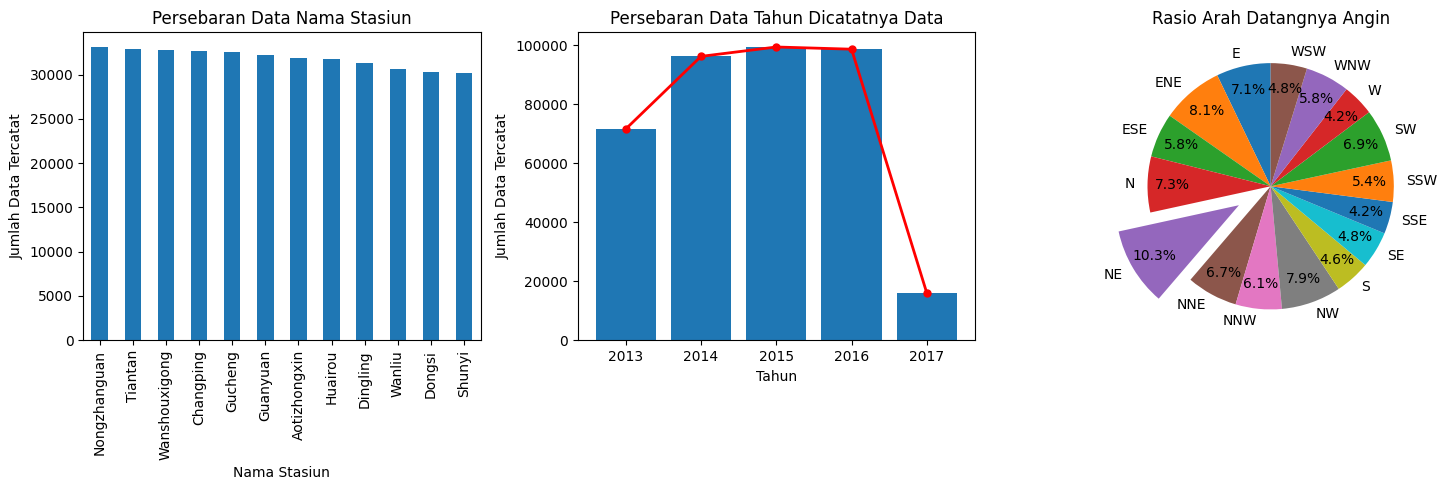

In [13]:
temp_df1 = clean_df['year'].value_counts().reset_index().sort_values('year')
temp_df2 = clean_df['wd'].value_counts().reset_index().sort_values('wd')
explode = [0 for _ in range(16)]
explode[4] = 0.3

plt.figure(figsize=(15,5))

plt.subplot(131)
clean_df['station'].value_counts().plot(kind='bar');    # Persebaran data station
plt.title('Persebaran Data Nama Stasiun')
plt.xlabel('Nama Stasiun')
plt.ylabel('Jumlah Data Tercatat')

plt.subplot(132)
plt.bar(temp_df1['year'], temp_df1['count']) 
plt.plot(temp_df1['year'], temp_df1['count'], linewidth=2, color='red', marker='o', markersize=5)
plt.title('Persebaran Data Tahun Dicatatnya Data')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Data Tercatat')

plt.subplot(133)
plt.pie(temp_df2['count'], labels=temp_df2['wd'], autopct='%1.1f%%', pctdistance=0.8, startangle=90, explode=explode)
plt.title('Rasio Arah Datangnya Angin')

plt.tight_layout()
plt.show()

**Insight:**
- Dari Persebaran Data Nama Stasiun, terlihat lebih jelas Stasiun Shunyi memiliki jumlah catatan data paling sedikit. Sedangkan Stasiun Nongzhanguan memiliki jumlah catatan data paling banyak
- Dari Visualisasi Persebaran Data Tahun, pencatatan data mengalami kenaikan dari tahun 2013 hingga 2015. Lalu, pencatatan data mengalami penurunan pada pada tahun 2016 dan menurun signifikan pada tahun 2017
- Dalam kurun waktu 5 tahun, Angin yang berhembus dari Timur Laut (North-East) adalah angin yang paling sering berhembus

## Visualization & Explanatory Analysis

### Pertanyaan 1:

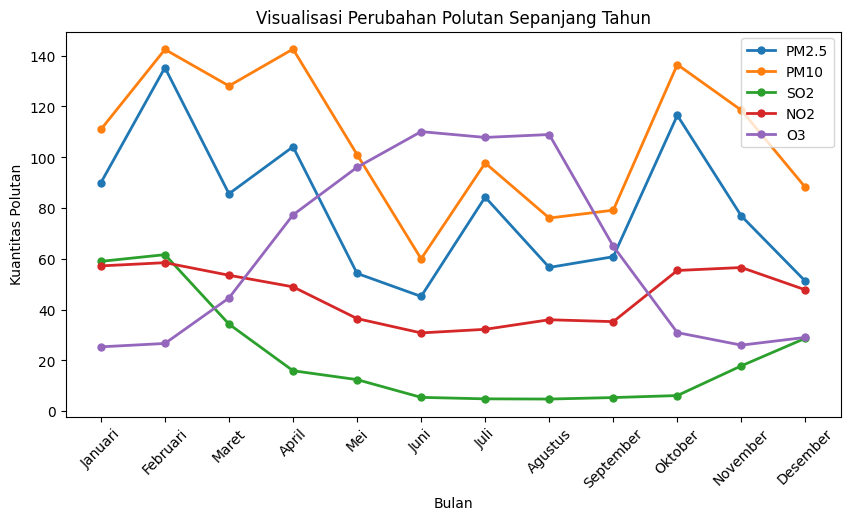

In [14]:
group_df = clean_df.groupby(by=['station','year','month']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'O3' : 'mean'
})

monthEncoder = {
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni",
    7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"
}

res_df = group_df.loc[('Changping',2014)]
colors = sns.color_palette("tab10", 6)

plt.figure(figsize=(10,5))
for ii, i in enumerate(res_df.columns):
    plt.plot(res_df.index.map(monthEncoder), res_df[i], label=i, linewidth=2, color=colors[ii], marker='o', markersize=5)
    plt.xticks(rotation=45)

plt.title('Visualisasi Perubahan Polutan Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Kuantitas Polutan')
plt.legend()
plt.show()

**Insight**
- Di Stasiun Changping, sepanjang tahun 2014 terlihat visualisasi perubahan polutan sesuai gambar diatas.
- Terlihat polutan PM10 dan PM2.5 memiliki rata-rata nilai yang selalu konsisten sepanjang tahun. PM10 selalu lebih tinggi daripada PM2.5. Setiap PM10 mengalami penurunan, PM2.5 juga ikut mengalami penurunan.
- Hal ini juga sama terlihat pada polutan NO2 dan SO2. Hampir sepanjang tahun, polutan SO2 memiliki nilai yang lebih rendah daripada polutan NO2.
- Sebaliknya, terjadi nilai yang terbalik pada O3, NO2, dan SO2. Setiap trend O3 naik, trend NO2 dan SO2 justru mengalami penurunan. Begitu pula sebaliknya.
- Dengan mengganti parameter di kodingan, bisa dilihat <u>perubahan polutan rata-rata selama 1 tahun</u>, <u>nama stasiun yang terkena</u>, dan <u>tahun berapa data itu dicatat</u>.

### Pertanyaan 2:

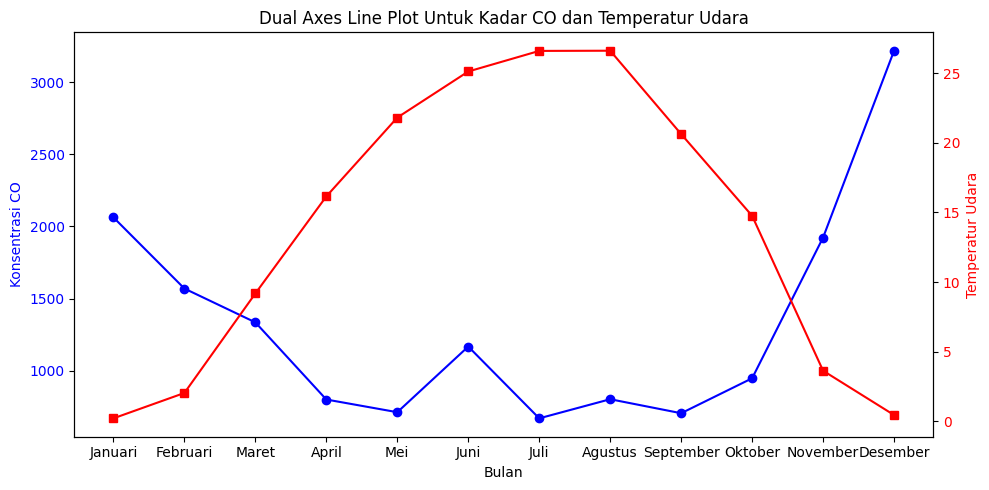

In [15]:
group_df = clean_df.groupby(by=['station','year','month']).agg({
    'CO' : 'mean',
    'TEMP' : 'mean'
})

monthEncoder = {
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni",
    7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"
}

res_df = group_df.loc[('Gucheng',2015)]
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(res_df.index.map(monthEncoder), res_df['CO'], color='b', marker='o', label='CO')
ax1.set_ylabel('Konsentrasi CO', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Temperatur Udara', color='r')
ax2.plot(res_df.index.map(monthEncoder), res_df['TEMP'], color='r', marker='s', label='Temperatur')
ax2.tick_params(axis='y', labelcolor='r')

ax1.set_xlabel('Bulan')
plt.title('Dual Axes Line Plot Untuk Kadar CO dan Temperatur Udara')
fig.tight_layout()
plt.show()


**Insight**
- Dapat dilihat dari visualisasi, di Stasiun Gucheng selama tahun 2015 trend dari CO dan suhu udara memiliki pola yang selalu terbalik. Ketika suhu udara tinggi, maka kadar CO di udara rendah. Sedangkan, ketika kadar suhu udara rendah, maka kadar CO di udara tinggi
- Dengan mengganti parameter di kodingan, bisa dilihat hubungan antara <u>CO dan temperatur udara</u>, <u>nama stasiun yang terkena</u>, dan <u>tahun berapa data itu dicatat</u>.

### Pertanyaan 3:

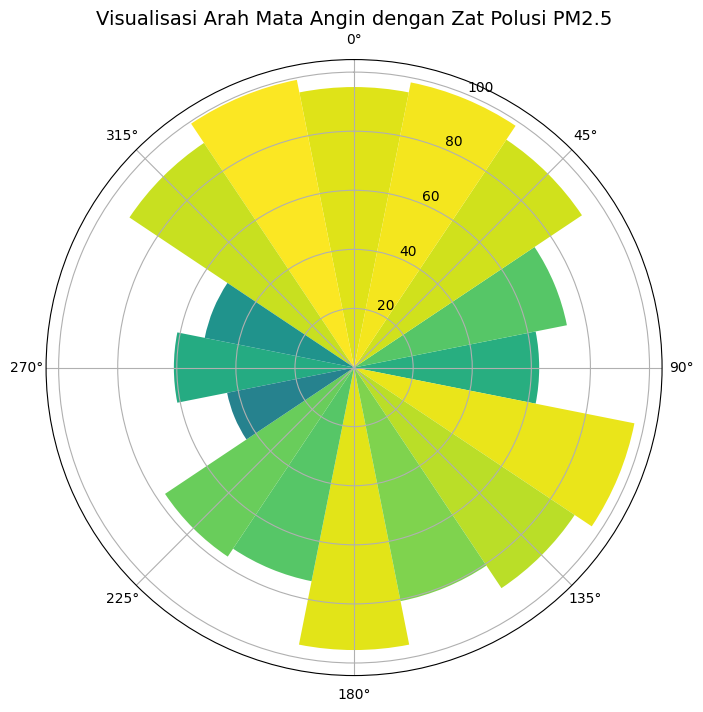

In [16]:
wind_degrees_dict = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

desired_order = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

group_df = clean_df.groupby(by=['station','year', 'wd']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean'
})

series = group_df.loc[('Aotizhongxin',2013)]['PM2.5']
pm25_concentrations = series[desired_order].values
wind_directions = series.index.map(wind_degrees_dict)
wind_directions_rad = np.deg2rad(wind_directions)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(wind_directions_rad, pm25_concentrations, width=np.pi/8, color=plt.cm.viridis(pm25_concentrations / 100))

ax.set_title("Visualisasi Arah Mata Angin dengan Zat Polusi PM2.5", fontsize=14)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.show()

**Insight:**
- 0&#176; menandakan Utara. 90&#176; menandakan Timur. 180&#176; menandakan Selatan. 270&#170; menandakan Barat.
- Terlihat kalau partikel PM2.5 di **Stasiun Aotizhongxin**, pada tahun **2013** rata-rata lebih sering terbawa oleh angin yang berasal dari arah <u>Barat Laut hingga Timur Laut</u>, <u>Tenggara</u>, dan <u>Selatan</u>.
- Dengan mengganti parameter di kodingan, bisa dilihat apa dan berapa rata-rata <u>zat yang dibawa angin</u>, <u>nama stasiun yang terkena</u>, dan <u>tahun berapa data itu dicatat</u>.


## Conclusion

+-----------+-----------------+--------------------+
| **Musim** | **Bulan Mulai** | **Bulan Berakhir** |
+-----------+-----------------+--------------------+
| Semi      | April           | Mei                |
+-----------+-----------------+--------------------+
| Panas     | Juni            | Agustus            |
+-----------+-----------------+--------------------+
| Gugur     | September       | Oktober            |
+-----------+-----------------+--------------------+
| Dingin    | November        | Maret              |
+-----------+-----------------+--------------------+

Jika dihubungkan dengan kondisi musim di Cina, maka:
- Simpulan pertanyaan 1 :
    - Pada Stasiun Changping di tahun 2014, Polutan PM2.5, PM10, SO2, NO2 mengalami penurunan selama musim Semi hingga Gugur. Sedangkan, polutan O3 justru mengalami kenaikan selama musim Semi hingga Gugur.
- Simpulan pertanyaan 2 :
    - Sesuai musimnya, pada Stasiun Gucheng di tahun 2015, temperatur tertinggi terjadi pada musim Panas, yakni pada bulan Juli hingga Agustus. Sedangkan temeperatur terendah terjadi pada musim Dingin, yakni pada bulan Desember hingga Januari.
    - Selama itu, kadar CO di udara mengalami nilai yang terbalik. Kadar CO tertinggi terjadi pada musim Dingin, yakni Desember hingga Januari dan kadar CO terendah justru terjadi pada musim Panas.
- Simpulan pertanyaan 3 :
    - Kadar polutan PM2.5 terbanyak pada Stasiun Aotizhongxin di tahun 2013 dibawa oleh angin yang berhembus dari arah Barat Laut hingga Timur Laut, Tenggara, dan Selatan. Oleh karena itu, ada baiknya untuk mencoba cek kondisi daerah angin berasal.